In [32]:
import pandas as pd
from tempForecast.components.data_transformation import WeatherDatabase

In [33]:
df = pd.read_csv("sept2022tosept2023.csv")
df = df.drop(columns="Unnamed: 0")
df = df.rename(columns={'Vent de direction': "vent_direction"})
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.head()

,Température,Vent,Rafales,vent_direction,Humidité,Pt de rosée,Pression,Bio-météo,Radiation solaire,Datetime
0,24.4,10.0,20.9,143.0,66.0,17.8,1008.0,30.1,NaN,2023-09-17 12:40:00
1,24.1,10.0,16.1,118.0,67.0,17.8,1008.1,29.8,NaN,2023-09-17 12:30:00
2,24.3,8.0,16.1,85.0,66.0,17.8,1008.2,30.0,NaN,2023-09-17 12:20:00
3,24.1,5.0,8.0,144.0,67.0,17.8,1008.4,29.8,NaN,2023-09-17 12:10:00
4,23.8,3.0,12.9,194.0,68.0,17.8,1008.6,29.5,NaN,2023-09-17 12:00:00


In [34]:
database  = WeatherDatabase()

In [35]:
database.insert_dataframe(df)


Error inserting into database: Error binding parameter 1 - probably unsupported type.


In [36]:
df_from_db = database.get_data()


In [37]:
df_from_db

,id,datetime,température,vent,rafales,vent_direction,humidite,pt_de_rosee,pression,bio_meteo,radiation_solaire
51222,51223,2023-10-16 12:30:00,11.8,15.0,NaN,None,52.0,2.2,1016.0,None,NaN
51223,51224,2023-10-16 12:20:00,11.6,13.0,NaN,None,56.0,2.8,1016.0,None,NaN
51224,51225,2023-10-16 12:10:00,11.3,19.0,NaN,None,55.0,2.2,1016.2,None,NaN
51225,51226,2023-10-16 12:00:00,11.1,15.0,27.4,131.0,59.0,3.3,1016.4,None,NaN
51226,51227,2023-10-16 11:50:00,10.8,15.0,NaN,None,59.0,2.8,1016.6,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
51217,51218,2022-09-18 00:40:00,11.4,3.0,8.0,318.0,67.0,5.6,1020.0,None,NaN
51218,51219,2022-09-18 00:30:00,11.4,5.0,11.3,229.0,67.0,5.6,1020.0,None,NaN
51219,51220,2022-09-18 00:20:00,11.5,3.0,8.0,304.0,66.0,5.6,1020.0,None,NaN
51220,51221,2022-09-18 00:10:00,11.6,6.0,14.5,275.0,66.0,5.6,1020.1,None,NaN


In [38]:
database.close_connection()


In [39]:
df = df_from_db.copy()

In [40]:
df.head()

,id,datetime,température,vent,rafales,vent_direction,humidite,pt_de_rosee,pression,bio_meteo,radiation_solaire
51222,51223,2023-10-16 12:30:00,11.8,15.0,NaN,None,52.0,2.2,1016.0,None,NaN
51223,51224,2023-10-16 12:20:00,11.6,13.0,NaN,None,56.0,2.8,1016.0,None,NaN
51224,51225,2023-10-16 12:10:00,11.3,19.0,NaN,None,55.0,2.2,1016.2,None,NaN
51225,51226,2023-10-16 12:00:00,11.1,15.0,27.4,131.0,59.0,3.3,1016.4,None,NaN
51226,51227,2023-10-16 11:50:00,10.8,15.0,NaN,None,59.0,2.8,1016.6,None,NaN


In [41]:
df = df[df['datetime'].dt.year > 2000].copy()

In [42]:
df.isna().sum()

id                       0
datetime                 0
température              6
vent                    26
rafales              13631
vent_direction       13631
humidite                 6
pt_de_rosee              6
pression                 0
bio_meteo            27274
radiation_solaire    48505
dtype: int64

In [43]:
df = df.dropna(subset=['température']).copy()

In [44]:
df['month'] = df['datetime'].dt.strftime('%B')

In [45]:
from tempForecast.utils.plot import plot_temperature_distribution

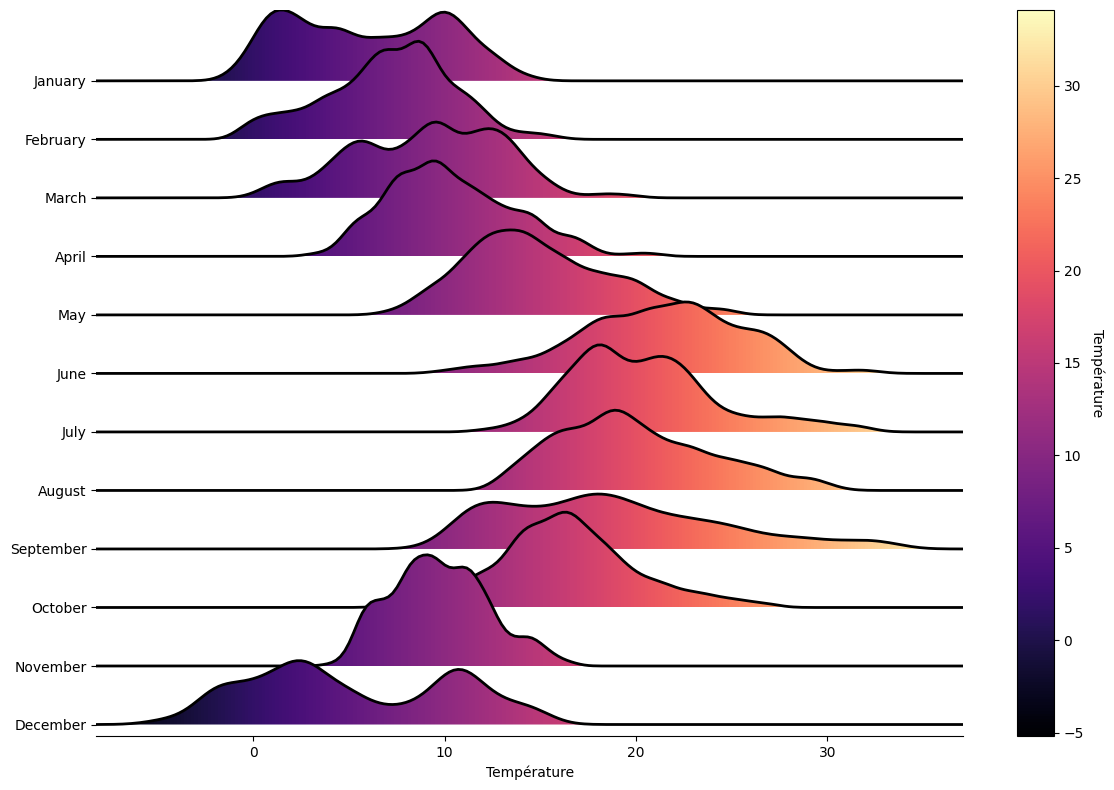

In [46]:
plot_temperature_distribution(df)

In [31]:
df

,id,datetime,température,vent,rafales,vent_direction,humidite,pt_de_rosee,pression,bio_meteo,radiation_solaire,month
35682,35683,2023-01-05 03:30:00,11.8,11.0,27.4,284.0,85.0,9.4,1022.8,None,NaN,January
33344,33345,2023-01-21 15:50:00,3.2,15.0,NaN,None,69.0,-2.2,1027.6,-0.4,25.0,January
33343,33344,2023-01-21 16:00:00,3.0,16.0,NaN,None,68.0,-2.2,1027.6,-0.9,18.0,January
33342,33343,2023-01-21 16:10:00,2.9,18.0,NaN,None,67.0,-2.8,1027.7,-1.3,9.0,January
33341,33342,2023-01-21 16:30:00,2.8,19.0,NaN,None,67.0,-2.8,1028.0,-1.6,5.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...
39205,39206,2022-12-11 08:30:00,-2.7,10.0,22.5,132.0,93.0,-3.3,1009.1,-6.4,21.0,December
39206,39207,2022-12-11 08:20:00,-2.6,5.0,14.5,283.0,93.0,-3.3,1009.2,-4.4,12.0,December
39207,39208,2022-12-11 08:10:00,-2.7,6.0,16.1,53.0,93.0,-3.3,1009.1,-5.3,9.0,December
39201,39202,2022-12-11 09:10:00,-2.3,5.0,12.9,36.0,93.0,-3.3,1009.2,-4.1,32.0,December
